# Experimental design and A/B testing


In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import t
import numpy
import math
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument("--headless")
from selenium.common.exceptions import WebDriverException
import re
import requests
from io import BytesIO
from PIL import Image
import pytesseract

In [5]:
data = pd.DataFrame({
'Version': ['A'] * 1000 + ['B'] * 1000,
'Conversion': [1] * 120 + [0] * 880 + [1] * 150 + [0] * 850,
'Click-through': [1] * 400 + [0] * 600 + [1] * 300 + [0] * 700,
'Bounce': [1] * 800 + [0] * 200 + [1] * 700 + [0] * 300,
'OrderValue': [50] * 120 + [0] * 880 + [60] * 150 + [0] * 850
})

In [6]:
data

,Version,Conversion,Click-through,Bounce,OrderValue
0,A,1,1,1,50
1,A,1,1,1,50
2,A,1,1,1,50
3,A,1,1,1,50
4,A,1,1,1,50
...,...,...,...,...,...
1995,B,0,0,0,0
1996,B,0,0,0,0
1997,B,0,0,0,0
1998,B,0,0,0,0


## Q:1
Is there a significant difference in the conversion rates of the two homepages? Null Hypothesis (H0): There is no significant difference in the conversion rates of the two homepages.
Alternative Hypothesis (Ha): There is a significant difference in the conversion rates of the
two homepages.

In [7]:
conversionSample1 = data[data['Version'] == 'A']['Conversion']
conversionSample1.reset_index(drop=True, inplace=True)


In [8]:
conversionSample2 = data[data['Version'] == 'B']['Conversion']
conversionSample2.reset_index(drop=True, inplace=True)


In [18]:
conversionSample1

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Conversion, Length: 1000, dtype: int64

In [19]:
conversionSample2


0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Conversion, Length: 1000, dtype: int64

## Q2 
Is there a significant difference in the order values of the two homepages? Null Hypothesis
(H0): There is no significant difference in the order values of the two homepages. Alternative
Hypothesis (Ha): There is a significant difference in the order values of the two homepages.


In [20]:
orderSample1 = data[data['Version'] == 'A']['OrderValue']
orderSample1.reset_index(drop=True, inplace=True)

In [21]:
orderSample2 = data[data['Version'] == 'B']['OrderValue']
orderSample2.reset_index(drop=True, inplace=True)

In [22]:
orderSample1

0      50
1      50
2      50
3      50
4      50
       ..
995     0
996     0
997     0
998     0
999     0
Name: OrderValue, Length: 1000, dtype: int64

In [23]:
orderSample2

0      60
1      60
2      60
3      60
4      60
       ..
995     0
996     0
997     0
998     0
999     0
Name: OrderValue, Length: 1000, dtype: int64

## Q:3
Is there a significant difference in the bounce values of the two homepages? Null Hypothesis
(H0): There is no significant difference in the bounce values of the two homepages. Alternative
Hypothesis (Ha): There is a significant difference in the bounce values of the two homepages.


In [24]:
bounceSample1 = data[data['Version'] == 'A']['Bounce']
bounceSample1.reset_index(drop=True, inplace=True)

In [25]:
bounceSample2 = data[data['Version'] == 'B']['Bounce']
bounceSample2.reset_index(drop=True, inplace=True)

In [26]:
bounceSample1

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Bounce, Length: 1000, dtype: int64

In [27]:
bounceSample2

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Bounce, Length: 1000, dtype: int64

# Task: Calculate confidence intervals for relevant variables to estimate the range within which the true population parameter lies.
Steps to calculate confidence intervals of continuous variable for patients with heart disease and
not. 1) Calculate the mean and standard deviation. 2) Calculate the standard error of the mean.
3) Calculate the critical value associated with your choice of confidence level. 4) Calculate the
margin of error by multiplying the standard error to the critical value. 5) Calculate the lower and
upper bounds of the confidence interval.


In [31]:
def confidenceIntervals(sample1, sample2):
    
        #Step 1
        meanSample1 = numpy.mean(sample1)
        meanSample2 = numpy.mean(sample2)
        stdSample1 = numpy.std(sample1)
        stdSample2 = numpy.std(sample2)
        #Step 2
        totalSample1 = len(sample1)
        totalSample2 = len(sample2)
        standardErrorSample1 = stdSample1 / math.sqrt(totalSample1)
        standardErrorSample2 = stdSample2 / math.sqrt(totalSample2)
        #Step 3
        confidence = 0.95
        sample1 = totalSample1 - 1
        sample2 = totalSample2 - 1
        critical = t.ppf((1 + confidence) / 2, min(sample1, sample2))
        #Step 4
        marginErrorSample1 = critical * standardErrorSample1
        marginErrorSample2 = critical * standardErrorSample2
        #Step 5
        sample1Lower = meanSample1 - marginErrorSample1
        sample1Upper = meanSample1 + marginErrorSample1
        sample2Lower = meanSample2 - marginErrorSample2
        sample2Upper = meanSample2 + marginErrorSample2
        return sample1Lower, sample1Upper, sample2Lower, sample2Upper


In [36]:
conversionS1L, conversionS1U, conversionS2L, conversionS2U = confidenceIntervals(conversionSample1, conversionSample2)
orderS1L, orderS1U, orderS2L, orderS2U = confidenceIntervals(orderSample1,orderSample2)
bounceS1L, bounceS1U, bounceS2L, bounceS2U = confidenceIntervals(bounceSample1,bounceSample2)


# Visualize the results of your hypothesis tests and confidence intervals, using plots or graphs to present the findings effectively.


<Axes: >

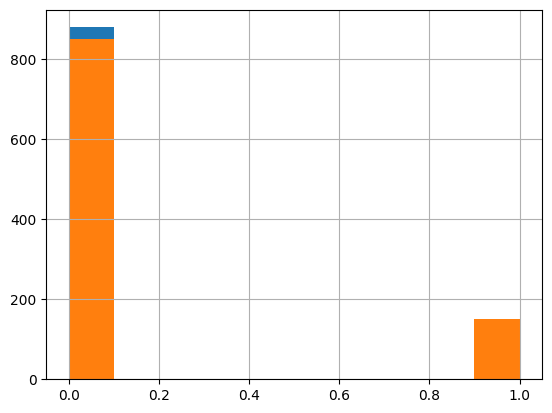

In [37]:
conversionSample1.hist()
conversionSample2.hist()

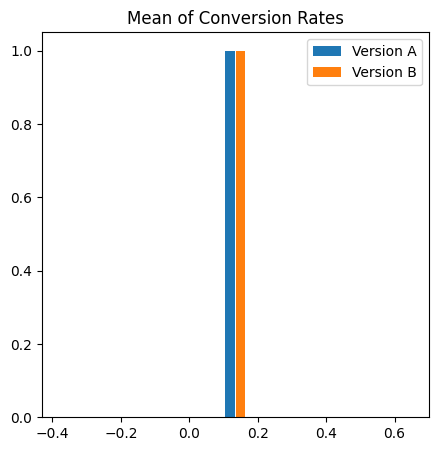

In [38]:
plot.figure(figsize=(5, 5))
plot.hist(numpy.mean(conversionSample1), bins = 35, label='Version A')
plot.hist(numpy.mean(conversionSample2), bins = 35, label='Version B')
plot.title('Mean of Conversion Rates')
plot.legend()
plot.show()

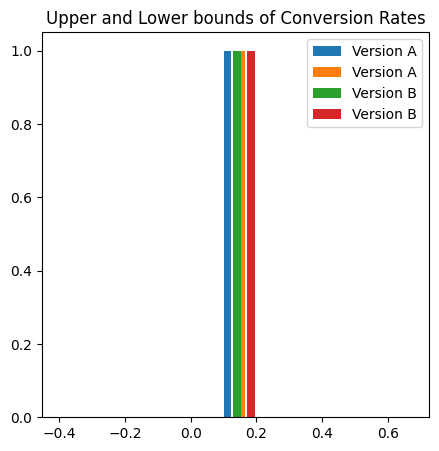

In [39]:
plot.figure(figsize=(5, 5))
plot.hist(conversionS1L, bins = 42, label='Version A')
plot.hist(conversionS1U, bins = 42, label='Version A')
plot.hist(conversionS2L, bins = 42, label='Version B')
plot.hist(conversionS2U, bins = 42, label='Version B')
plot.title('Upper and Lower bounds of Conversion Rates')
plot.legend()
plot.show()


<Axes: >

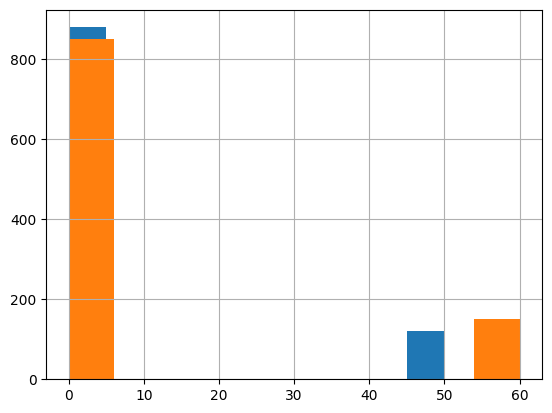

In [40]:
orderSample1.hist()
orderSample2.hist()


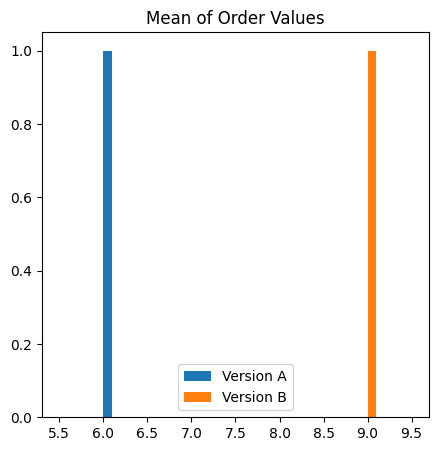

In [41]:
plot.figure(figsize=(5, 5))
plot.hist(numpy.mean(orderSample1), bins = 10, label='Version A')
plot.hist(numpy.mean(orderSample2), bins = 10, label='Version B')
plot.title('Mean of Order Values')
plot.legend()
plot.show()


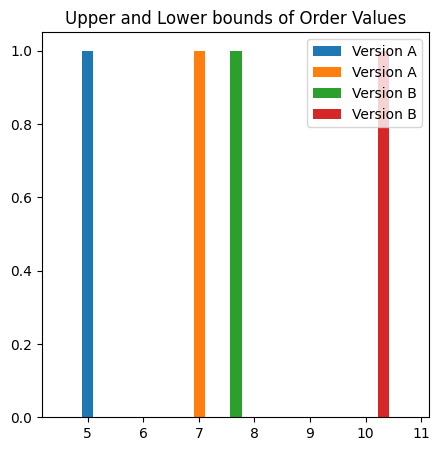

In [42]:
plot.figure(figsize=(5, 5))
plot.hist(orderS1L, bins = 5, label='Version A')
plot.hist(orderS1U, bins = 5, label='Version A')
plot.hist(orderS2L, bins = 5, label='Version B')
plot.hist(orderS2U, bins = 5, label='Version B')
plot.title('Upper and Lower bounds of Order Values')
plot.legend()
plot.show()

<Axes: >

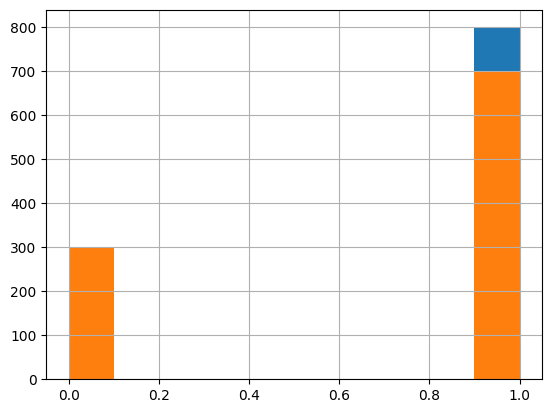

In [43]:
bounceSample1.hist()
bounceSample2.hist()


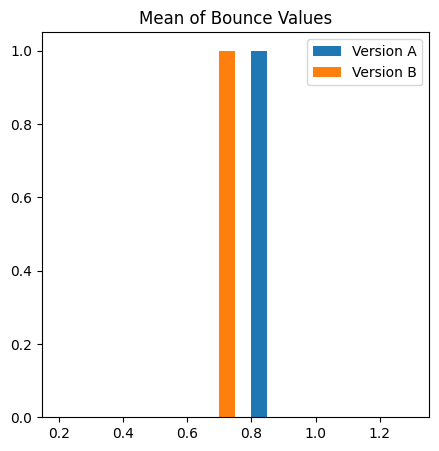

In [44]:
plot.figure(figsize=(5, 5))
plot.hist(numpy.mean(bounceSample1), bins = 20, label='Version A')
plot.hist(numpy.mean(bounceSample2), bins = 20, label='Version B')
plot.title('Mean of Bounce Values')
plot.legend()
plot.show()


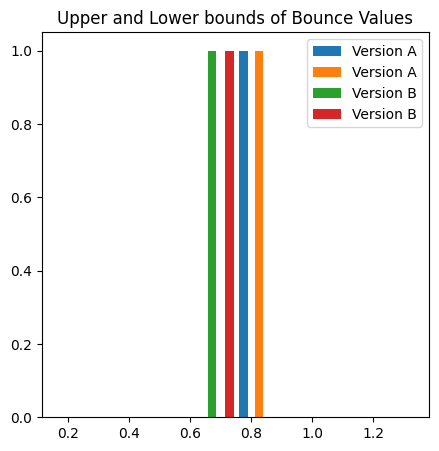

In [45]:
plot.figure(figsize=(5, 5))
plot.hist(bounceS1L, bins = 35, label='Version A')
plot.hist(bounceS1U, bins = 35, label='Version A')
plot.hist(bounceS2L, bins = 35, label='Version B')
plot.hist(bounceS2U, bins = 35, label='Version B')
plot.title('Upper and Lower bounds of Bounce Values')
plot.legend()
plot.show()


#  Summarize your findings, including the outcomes of hypothesis tests and the interpretation of confidence intervals.


I started by looking at the dataset and understanding its structure. My main goal is to perform A/B testing to determine which website version will be more beneficial for our e-commerce company that sells clothing online. I focused on three metrics: conversion rate, order values, and bounce values.

Conversion rate tells us if users are successfully using a particular website version, order values indicate the amount of orders placed, and bounce values represent users who left without taking any action. I set up null and alternative hypotheses for each metric to determine if there is a significant difference between version 'A' and 'B'.

To analyze the data, I used statistical tests such as t-tests for continuous variables. I found that a commonly used significance level is 0.05, meaning that if the p-value is less than 0.05, the results are considered statistically significant.

Based on the p-values, I rejected the null hypotheses for conversion rate, order values, and bounce values, indicating that there are significant differences between the two website versions.

To gain a deeper understanding of the data distribution, I calculated confidence intervals. This involved calculating the mean, standard deviation, standard error of the mean, critical value, margin of error, and lower and upper bounds for each group. I visualized the data using histograms to show the distribution, means, and bounds for each group.

The results of the confidence intervals supported my recommendation to choose version 'B' as the homepage. The mean conversion rate and order values were slightly higher for 'B', which is positive. Additionally, the bounce mean value was lower for 'B', making it a more suitable choice. The confidence intervals with a 95% confidence level showed that the lower bound of order values for 'B' was higher than the upper bound of 'A'. The conversion rate bounds for 'B' were also higher than 'A', while the bounce value bounds were better for 'A'.

In summary, I suggest that the company adopts version 'B' as the homepage since it has a better conversion rate, higher order values, and lower bounce values compared to 'A'.